# Testing

In [3]:
# imports
from matplotlib import pyplot as plt
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs

from netCDF4 import Dataset
import numpy as np
import healpy as hp

import pandas as pd
import netCDF4

In [21]:
%matplotlib notebook

# Load

In [2]:
my_example_nc_file = './sst.day.mean.1981.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [3]:
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA High-resolution Blended Analysis: Daily Values using AVHRR only
    institution: NOAA/NCDC
    source: NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment: Reynolds, et al., 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496.  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy NOAA17 NOAA18 AVHRR, Ice data: NCEP ice.
    history: Thu Aug 24 13:34:17 2017: ncatted -O -a References,global,d,, sst.day.mean.1981.v2.nc
Version 1.0
    references: https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    dimensions(sizes): time(122), lat(720), lon(1440)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 sst(time,lat,lon)
    groups: 

In [4]:
180*4, 360*4

(720, 1440)

In [5]:
fh.variables.keys()

odict_keys(['time', 'lat', 'lon', 'sst'])

In [6]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
times = fh.variables['time']
sst = fh.variables['sst'][:]

sst_units = fh.variables['sst'].units
fh.close()

# Plot

In [7]:
sst.shape

(122, 720, 1440)

## Day 1

In [8]:
sst_one = sst[-1,:,:] #dataset.variables['sst'][timeindex,:].squeeze()
sst_one.shape

(720, 1440)

In [ ]:
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
#
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst_one, 60,
             transform=ccrs.PlateCarree())

#ax.coastlines()

plt.show()

In [10]:
lats.shape

(720,)

----

In [4]:
import iris
from iris import quickplot

In [5]:
cubes = iris.load('sst.day.mean.1981.nc')

In [6]:
cubes

[<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 122; latitude: 720; longitude: 1440)>]

In [7]:
type(cubes)

iris.cube.CubeList

In [8]:
sst = cubes[0]

In [9]:
sst

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 122; latitude: 720; longitude: 1440)>

In [10]:
sst.units

Unit('degC')

In [11]:
sst.data.shape

(122, 720, 1440)

In [12]:
sst.shape

(122, 720, 1440)

In [13]:
sst.cell_methods

()

In [14]:
coord_names = [coord.name() for coord in sst.coords()]

In [15]:
coord_names

['time', 'latitude', 'longitude']

In [16]:
sst.coord('time').units

Unit('days since 1800-01-01 00:00:00', calendar='gregorian')

In [17]:
sst0 = sst[0,:,:]

In [18]:
sst0

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (latitude: 720; longitude: 1440)>

<IPython.core.display.Javascript object>


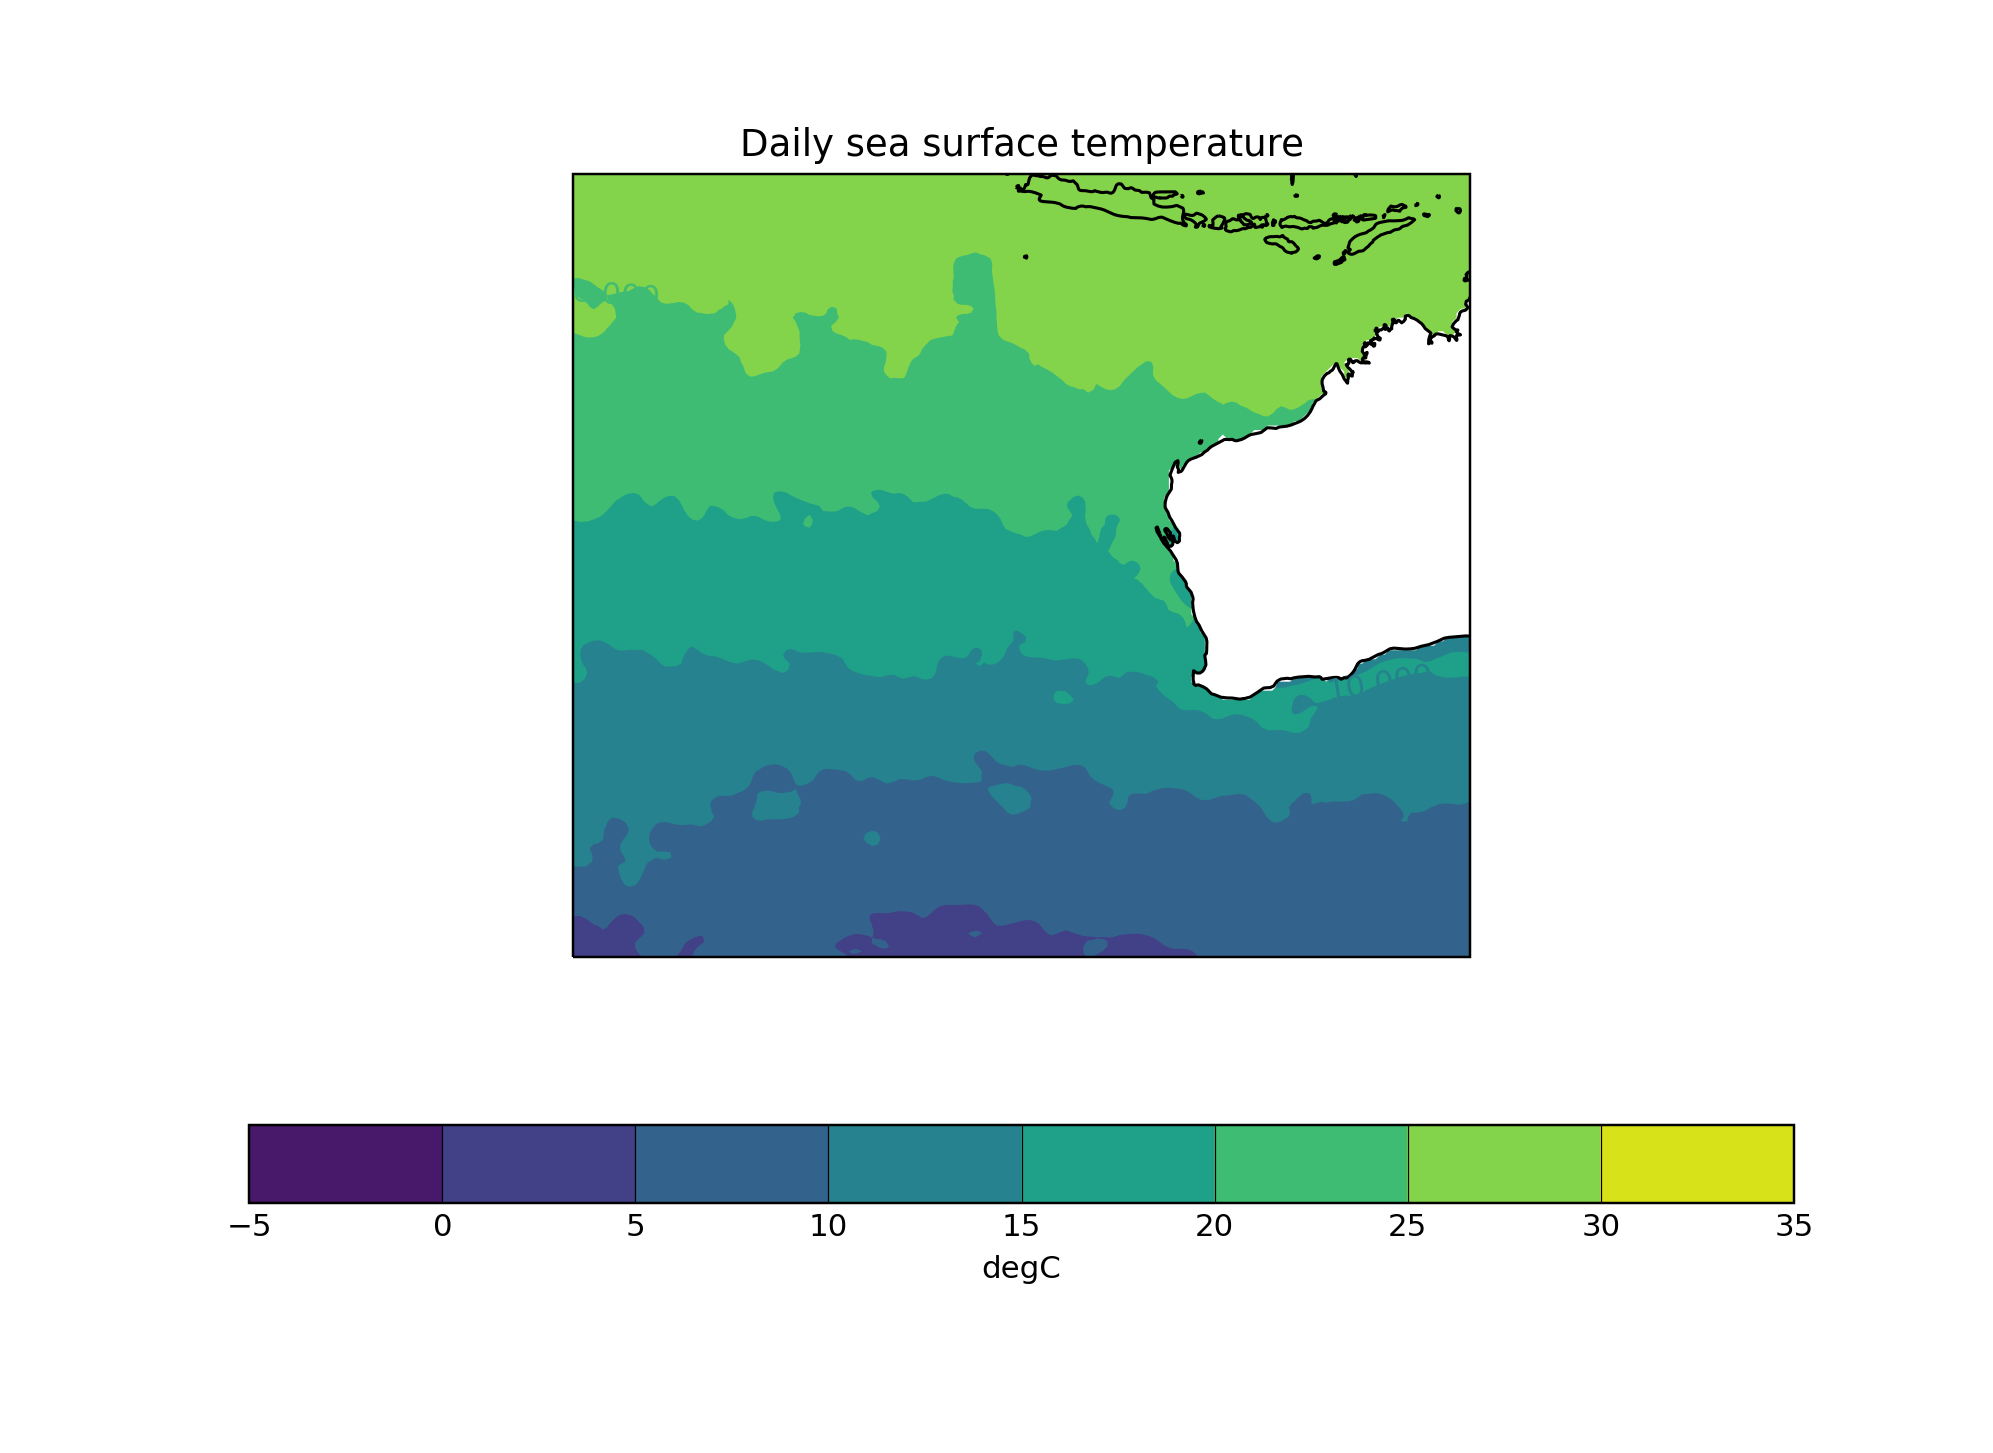

In [22]:
# Add a contour, and put the result in a variable called contour.
contour = quickplot.contourf(sst0)

# Add coastlines to the map created by contour.
plt.gca().coastlines()

# Add contour labels based on the contour we have just created.
plt.clabel(contour, inline=False)

plt.show()